In [2]:
import tensorflow as tf

In [3]:
hello = tf.constant("Hello world")
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
print(node1, node2)

tf.Tensor(3.0, shape=(), dtype=float32) tf.Tensor(4.0, shape=(), dtype=float32)


In [4]:
@tf.function
def forward():
    return node1 + node2
out_a = forward()
print(out_a)

tf.Tensor(7.0, shape=(), dtype=float32)


In [83]:
x_train = [1,2,3]
y_train = [4,5,6]

W = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bais")
hypothesis = W *x_train + b
print(W, b)
print(hypothesis)

<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([0.70167255], dtype=float32)> <tf.Variable 'bais:0' shape=(1,) dtype=float32, numpy=array([0.01456629], dtype=float32)>
tf.Tensor([0.71623886 1.4179114  2.1195838 ], shape=(3,), dtype=float32)


In [92]:
@tf.function
def cost():
    hypothesis = W *x_train + b
    return tf.reduce_mean(tf.square(hypothesis - y_train))

# cost = lambda : (tf.reduce_mean(tf.square(hypothesis - y_train))) 
# cost = lambda : (tf.reduce_mean(tf.square(W*x_train + b - y_train))) 
# cost = lambda : (tf.reduce_mean(tf.square(tf.math.subtract(tf.math.add(tf.math.multiply(W,x_train), b), y_train)))) 


# cost = tf.reduce_mean(tf.square(hypothesis - y_train))
# cost = lambda: tf.reduce_mean(tf.square(W))

In [93]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [95]:
for i in range(10):
    optimizer.minimize(cost, var_list=[W, b])

In [96]:
optimizer.minimize(cost, var_list=[W,b])


<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=11>

In [97]:
print(W,b)

<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([1.6540514], dtype=float32)> <tf.Variable 'bais:0' shape=(1,) dtype=float32, numpy=array([0.50809294], dtype=float32)>


In [103]:
print(W)

<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([1.2897161], dtype=float32)>


In [117]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array([1,2,3])
Y = np.array([1,2,3])
W = tf.Variable(tf.random.normal([1]), name="weight")
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

@tf.function
def forward(W):
    return tf.reduce_mean(tf.square(W * X - Y))

w_val = []
cost_val = []

for i in range(-30, 50):
    feed_w = i * 0.1
    w_val.append(feed_w)
    cost_val.append(forward(feed_w).numpy())

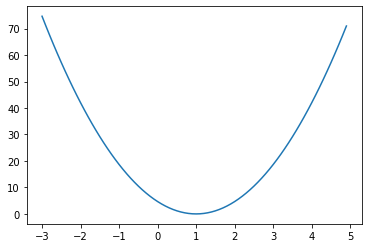

In [118]:
plt.plot(w_val, cost_val)

In [114]:


result = forward(1.2)
print(result.numpy())


0.1866666666666665


In [133]:
learning_rate = 0.1
# W = tf.Variable(tf.random.normal([1]), name="weight")
W = tf.Variable(tf.constant(5, tf.float32), name="weight")

@tf.function
def forward():
    gradient = tf.reduce_mean((W*X - Y) * X)
    descent = W - learning_rate * gradient
    update = W.assign(descent)
    return gradient, update
#     return tf.reduce_mean(tf.square(W * X - Y))

for i in range(21):
    g,u = forward()
    print(i, g, u)


0 tf.Tensor(18.666666, shape=(), dtype=float32) tf.Tensor(3.1333332, shape=(), dtype=float32)
1 tf.Tensor(9.955555, shape=(), dtype=float32) tf.Tensor(2.1377778, shape=(), dtype=float32)
2 tf.Tensor(5.3096294, shape=(), dtype=float32) tf.Tensor(1.6068149, shape=(), dtype=float32)
3 tf.Tensor(2.8318026, shape=(), dtype=float32) tf.Tensor(1.3236346, shape=(), dtype=float32)
4 tf.Tensor(1.5102949, shape=(), dtype=float32) tf.Tensor(1.1726052, shape=(), dtype=float32)
5 tf.Tensor(0.8054908, shape=(), dtype=float32) tf.Tensor(1.092056, shape=(), dtype=float32)
6 tf.Tensor(0.42959484, shape=(), dtype=float32) tf.Tensor(1.0490966, shape=(), dtype=float32)
7 tf.Tensor(0.2291174, shape=(), dtype=float32) tf.Tensor(1.0261848, shape=(), dtype=float32)
8 tf.Tensor(0.12219572, shape=(), dtype=float32) tf.Tensor(1.0139652, shape=(), dtype=float32)
9 tf.Tensor(0.06517128, shape=(), dtype=float32) tf.Tensor(1.0074481, shape=(), dtype=float32)
10 tf.Tensor(0.034757573, shape=(), dtype=float32) tf.Tenso

In [126]:
print(W)

<tf.Variable 'weight:0' shape=(1,) dtype=float32, numpy=array([0.999995], dtype=float32)>


In [ ]:
def train_batch(self, dataset_batch_x, dataset_batch_y): 
    with tf.GradientTape() as tape: 
        hypothesis = dataset_batch_x * self.w + self.b 
        loss = tf.reduce_mean(tf.square(hypothesis - dataset_batch_y)) 
        loss_w, loss_b = tape.gradient(loss, [self.w, self.b]) 
        self.w.assign_sub(self.learning_rate * loss_w) 
        self.b.assign_sub(self.learning_rate * loss_b) 
        return loss

In [119]:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
import numpy as np
import os
import cv2
import random
from matplotlib import pyplot as plt
# scattering 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import adjusted_rand_score

In [303]:
def get_sample_and_noise(data, N=300):
    # data = [[m,s],[m,s],[m,s], label]
    m,s = data[0]
    X = np.random.normal(m, s, N)
    X_noise = np.random.normal(m, s + 2, int(N * 00.1))
    m,s = data[1]
    Y = np.random.normal(m, s, N)
    Y_noise = np.random.normal(m, s + 2, int(N * 00.1))
    m,s = data[2]
    Z = np.random.normal(m, s, N)
    Z_noise = np.random.normal(m, s + 2, int(N * 00.1))
    return np.array(list(zip(X,Y,Z))), np.array(list(zip(np.concatenate((X, X_noise)), np.concatenate((Y, Y_noise)), np.concatenate((Z, Z_noise)))))



In [304]:
M = 20
S = 1
C = 5
# X, Y, Z, label
data = np.array([[
#     [random.randint(0, M) ,abs(random.randint(1,S))],[random.randint(0, M) ,abs(random.randint(1,S))],[random.randint(0, M) ,abs(random.randint(1,S))], i
    [10 ,abs(random.randint(1,S))],[10, abs(random.randint(1,S))],[10, abs(random.randint(1,S))], i
#     [random.randint(0, M) ,abs(random.randint(1,S))],[random.randint(0, M) ,abs(random.randint(1,S)/100)],[random.randint(0, M) ,abs(random.randint(1,S)/100)], i
    ] for i in range(C)
])

<ipython-input-304-e5bb07a4723c>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  data = np.array([[


In [305]:
D, ND = get_sample_and_noise(data[0], N=1000)

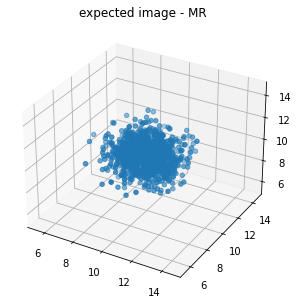

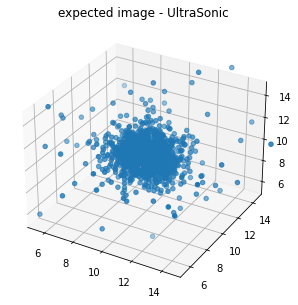

In [306]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object
lim = (5,15)
d_p = D.T
ax.scatter(d_p[0], d_p[1], d_p[2])
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_zlim(lim)
plt.title("expected image - MR")
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

d_p = ND.T
ax.scatter(d_p[0], d_p[1], d_p[2])
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_zlim(lim)

plt.title("expected image - UltraSonic")
plt.show()
# for x, y, z, l in data:
#     print("X : {}, Y : {}, Z : {}, label : {}".format(x,y,z,l))

In [320]:
# Slicing XZ plane
# box_range = [(), (), ()]
def slicer(box_range, points):
    M = np.zeros((len(range(*box_range[0])) * 10, len(range(*box_range[1])) * 10, len(range(*box_range[2])) * 10))
    print(len(range(*box_range[0])) * 10, len(range(*box_range[1])) * 10, len(range(*box_range[2])) * 10)
#     print(M.shape)
    print(box_range)
    for x,y,z in points[:]:
#         print(x,y,z)
#         print(int((y - box_range[1][0]) * 10), int((x - box_range[0][0]) * 10),int((z - box_range[2][0]) * 10))
        if (box_range[0][0] < x < box_range[0][1]) and (box_range[1][0] < y < box_range[1][1]) and (box_range[2][0] < z < box_range[2][1]):
            print(int((y - box_range[1][0]) * 10), end=',')
            M[int((y - box_range[1][0]) * 10)][int((x - box_range[0][0]) * 10)][int((z - box_range[2][0]) * 10)] = 1 
    return M
# def reverse_slicer

In [321]:
D.shape

(1000, 3)

In [322]:
sliced = slicer([lim,lim,lim], D)

100 100 100
[(5, 15), (5, 15), (5, 15)]
24,51,45,63,61,57,62,42,57,53,38,41,44,47,34,58,54,61,61,52,50,58,52,57,11,55,41,50,52,48,50,46,49,57,49,57,51,58,49,67,41,51,52,52,34,35,78,48,58,60,64,50,41,55,35,65,50,43,56,50,46,44,39,47,52,48,18,50,49,55,79,57,47,51,53,32,53,43,42,33,47,33,65,40,45,48,55,50,50,54,57,45,54,49,41,42,64,59,54,45,20,53,41,26,51,56,39,40,58,40,35,37,53,54,61,52,41,51,55,62,55,48,39,40,41,53,54,63,57,21,44,41,49,50,72,62,45,56,38,58,52,48,59,44,67,41,54,45,62,46,52,50,57,60,46,51,48,39,70,50,43,43,46,51,38,69,44,38,47,52,23,56,35,40,62,26,46,46,32,48,55,36,37,49,42,49,59,45,47,40,48,76,44,50,44,59,37,38,52,40,61,38,42,47,54,58,62,43,47,45,50,44,35,46,39,57,56,36,51,69,45,53,55,44,56,60,59,40,50,59,54,48,52,28,46,59,42,55,58,48,40,68,48,48,40,42,44,45,42,62,33,54,45,52,65,55,51,59,49,35,48,34,45,65,70,50,50,36,51,53,48,57,44,48,43,63,25,38,53,54,72,42,58,56,55,43,32,35,65,63,64,37,63,63,19,46,69,52,56,44,40,51,58,50,45,60,63,43,66,58,38,54,60,50,47,42,64,39,41,48,

In [323]:
for s in sliced[50]:
    print(s)
# print(sliced[47])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

In [329]:
M = np.zeros((3, 4, 5))

In [330]:
M

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]])

In [1]:
import torch

In [8]:
x = torch.tensor(data=[2.0, 3.0], requires_grad=True)
y = x**2
z = 2*y + 3
target = torch.tensor([3.0, 4.0])
loss = torch.sum(torch.abs(z-target))
# loss = torch.sum(torch.mean(torch.square(z-target)))
loss.backward()

In [9]:
print(x.grad, y.grad, z.grad)

tensor([ 8., 12.]) None None


<ipython-input-9-6c1d48845c75>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(x.grad, y.grad, z.grad)


In [10]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init